In [198]:
# Import necessary libraries
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [199]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [200]:
# Function to make a graph
def make_graph(stock, revenue, title='Acciones e Ingresos'):
    # Convert dates to Julian day numbers
    stock = mdates.date2num(stock)
    
    plt.plot(stock, label='Stock Price')
    plt.plot(revenue, label='Revenue')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title(title)
    plt.legend()
    plt.show()



# Question 1 - Extracting Tesla Stock Data Using yfinance


In [201]:
# Replace 'TSLA' with your desired stock symbol
ticker_symbol = 'TSLA'

# Download historical stock data using yfinance
tesla_stock_data = yf.download(ticker_symbol, start='2022-01-01', end='2023-01-01')

# Reset the index and display the first five rows
print(tesla_stock_data.reset_index().head())



[*********************100%%**********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
1 2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2 2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
3 2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
4 2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

      Volume  
0  103931400  
1  100248300  
2   80119800  
3   90336600  
4   84164700  



# Question 2 - Extracting Tesla Revenue Data Using Webscraping


In [202]:

import requests


# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table with Tesla Revenue
    tesla_table = soup.find('table')  # You can also use more specific criteria here

    if tesla_table:
        # Use pandas to read HTML table and convert it into a DataFrame
        tesla_revenue = pd.read_html(str(tesla_table))[0]

        # Rename columns to 'Date' and 'Revenue'
        tesla_revenue.columns = ['Date', 'Revenue']

        print("DataFrame 'tesla_revenue' created successfully:")
        print(tesla_revenue.head())
    else:
        print("No table found in the HTML.")
        print(soup.prettify())
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")


DataFrame 'tesla_revenue' created successfully:
   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


In [203]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue = tesla_revenue['Revenue']
tesla_revenue.head()

0    $6,466
1    $8,285
2    $8,547
3    $7,965
4    $9,364
Name: Revenue, dtype: object


# Question 3 - Extracting GameStop Stock Data Using yfinance


In [204]:
# Ticker symbol for GameStop
ticker_symbol = "GME"

# Create a Ticker object
gme_data = yf.Ticker(ticker_symbol)

# Download historical stock data using history method
gme_stock_data = gme_data.history(period="max")

# Display the stock data
print("GameStop Stock Data:")
print(gme_stock_data.head())

GameStop Stock Data:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [205]:
# Make a request to the website
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(r.text, 'html.parser')

# Find the table in the HTML
table = soup.find_all('table')[0] 

# Convert the table to a pandas DataFrame
df = pd.read_html(str(table), header=0)[0]

# Filter the DataFrame to only include GME data
gme_revenue = df['GameStop Annual Revenue (Millions of US $).1']

# Display the last five rows
print(gme_revenue.tail())

11    $8,806
12    $7,094
13    $5,319
14    $3,092
15    $1,843
Name: GameStop Annual Revenue (Millions of US $).1, dtype: object



# Question 5 - Tesla Stock and Revenue Dashboard


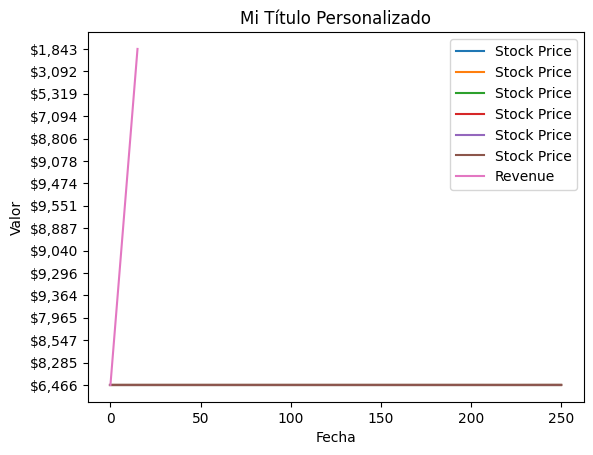

In [206]:
make_graph(tesla_stock_data, tesla_revenue, title='Mi Título Personalizado')


# Question 6 - GameStop Stock and Revenue Dashboard


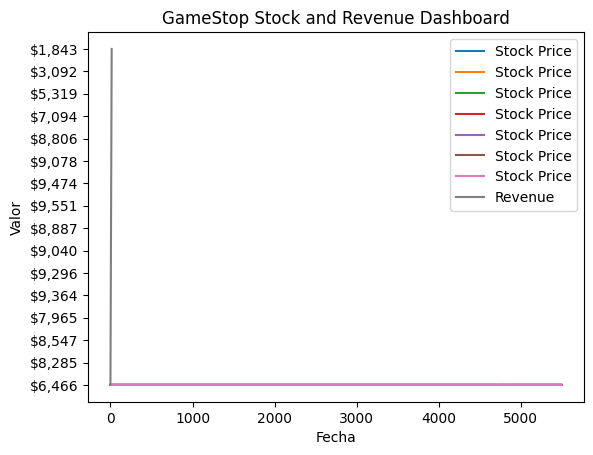

In [208]:
make_graph(gme_stock_data, gme_revenue, title='GameStop Stock and Revenue Dashboard')